<a href="https://colab.research.google.com/github/almendruki/Cosas-TDA/blob/main/Manifold_Hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# La "Maldición de la Dimensionalidad" y Reducción de Dimensionalidad Básica


* Objetivo: Ilustrar por qué es difícil trabajar con datos de alta dimensión y cómo los métodos de reducción de dimensionalidad intentan abordarlo.
* Contenido:
    - Visualización de datos dispersos: Genera conjuntos de datos sintéticos muy simples pero en alta dimensión (ej., puntos aleatorios en un hipercubo de 2, 3, 10, 50 dimensiones). Demuestra cómo la densidad de los datos disminuye drásticamente a medida que aumenta la dimensión, haciendo que la mayoría del espacio sea "ruido puro".
    - Proyecciones Lineales vs. No Lineales:
        + Crear un conjunto de datos que se encuentre en una variedad (manifold) no lineal, como el "Swiss roll" o la "S-curve".
        + Aplicar Análisis de Componentes Principales (PCA) para reducir su dimensión a 2D o 3D y observa cómo se "colapsa" la estructura no lineal original.
        + Aplicar métodos de proyección no lineal como t-SNE o UMAP a los mismos datos y observar cómo estos métodos son capaces de preservar mejor la estructura subyacente de baja dimensión. Explicar que estos métodos deforman los datos minimizando la distorsión de distancias.
* Conexión con la Clase Teórica: Esta sección aborda directamente la "maldición de la dimensionalidad" y la necesidad de considerar la estructura geométrica de los datos, así como las limitaciones de las proyecciones lineales y el valor de las no lineales.
* Herramientas Prácticas: Python con numpy para generación de datos, scipy para calculo de distancias, scikit-learn para PCA y t-SNE, umap-learn para UMAP, y matplotlib/plotly para visualizaciones 2D/3D.



## Visualizando la "Maldición de la Dimensionalidad"


### Objetivo: Demostrar por qué los datos reales no pueden llenar todo el espacio de alta dimensión.

#### Parte A: Distribución de distancias


* Generar 1000 puntos aleatorios en dimensiones 2, 10, 50, 100.
* Calcular todas las distancias pairwise.
* Plotear histogramas de distancias para cada dimensión.
* Observar cómo las distancias se concentran en un rango estrecho a medida que aumenta la dimensionalidad:
    - Hallamos la media y la desviación estándar
    - Hallamos la desviacion estandar relativa que nos da una medida de la dispersión de los datos.

In [ ]:
!pip install umap-learn    # to install umap if missing
!pip install numba   # installing numba if not present

import math
import numpy as np

import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

np.math = math # avoid error `module 'numpy' has no attribute 'math'`
def curse_of_dimensionality_demo(metric="euclidean", p=None):
    """Demuestra cómo las distancias se comportan en alta dimensión"""

    dims = [2, 5, 10, 20, 50, 100]
    n_points = 1000

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()


    distance_stats = []

    for i, d in enumerate(dims):
        # Generar puntos aleatorios uniformes en [-1,1]^d
        points = np.random.uniform(-1, 1, (n_points, d))
        distances = pdist(points, metric=metric, p=p) if metric == "minkowski" else pdist(points, metric=metric)

        # Estadísticas
        mean_dist = np.mean(distances)
        std_dist = np.std(distances)
        relative_std = (std_dist / mean_dist)

        distance_stats.append([d, mean_dist, std_dist, relative_std])

        # Histograma
        axes[i].hist(distances, bins=50, alpha=0.7, density=True)
        axes[i].set_title(f'Dim {d}: μ={mean_dist:.2f}, σ/μ={relative_std:.3f}')
        axes[i].set_xlabel('Distancia')
        axes[i].set_ylabel('Densidad')
        axes[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Mostrar tendencia
    stats = np.array(distance_stats)
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(stats[:, 0], stats[:, 1], 'bo-')
    plt.xlabel('Dimensión')
    plt.ylabel('Distancia promedio')
    plt.title('Distancia promedio vs Dimensión')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(stats[:, 0], stats[:, 3], 'ro-')
    plt.xlabel('Dimensión')
    plt.ylabel('σ/μ (variabilidad relativa)')
    plt.title('Las distancias se vuelven más uniformes')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return stats


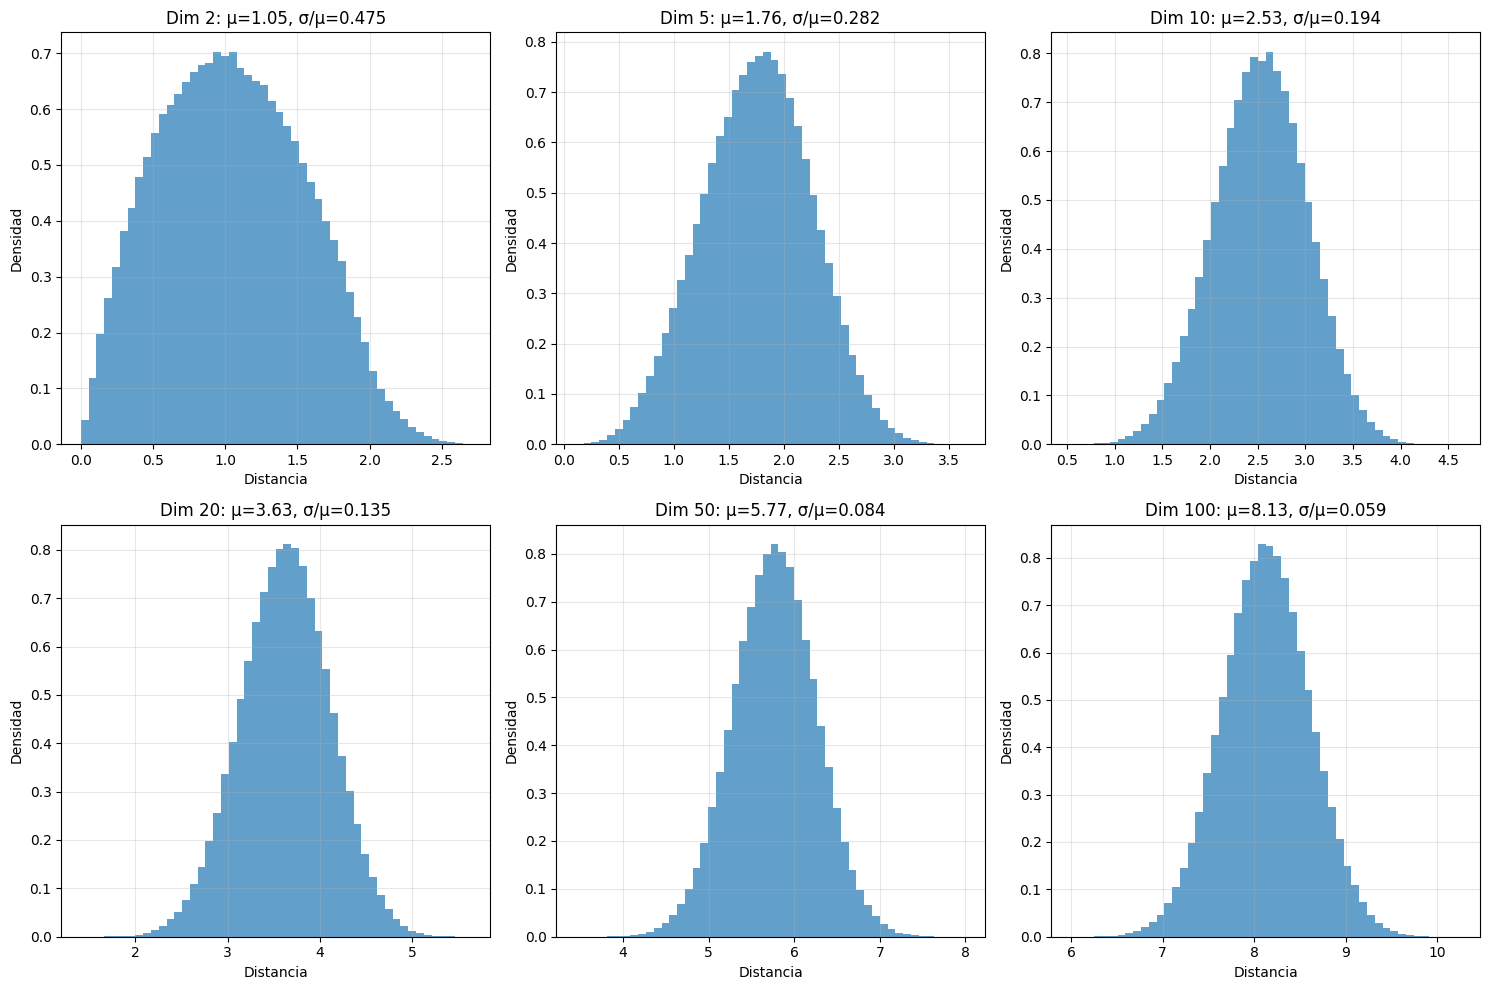

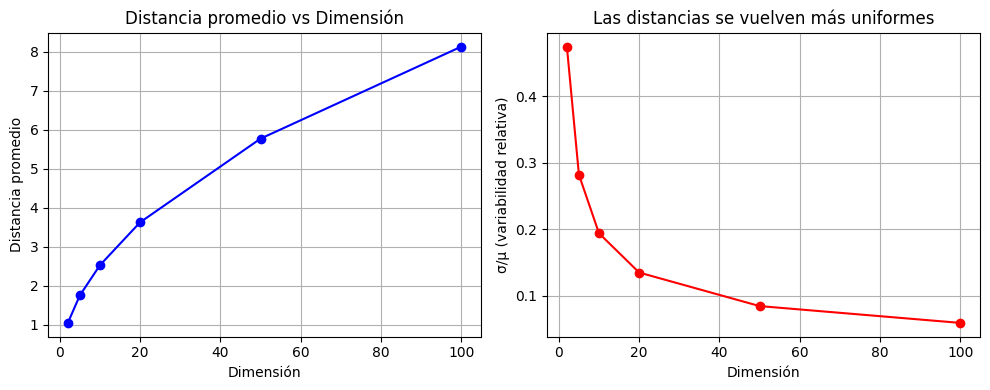

In [ ]:
# Ejecutar
stats = curse_of_dimensionality_demo("euclidean")

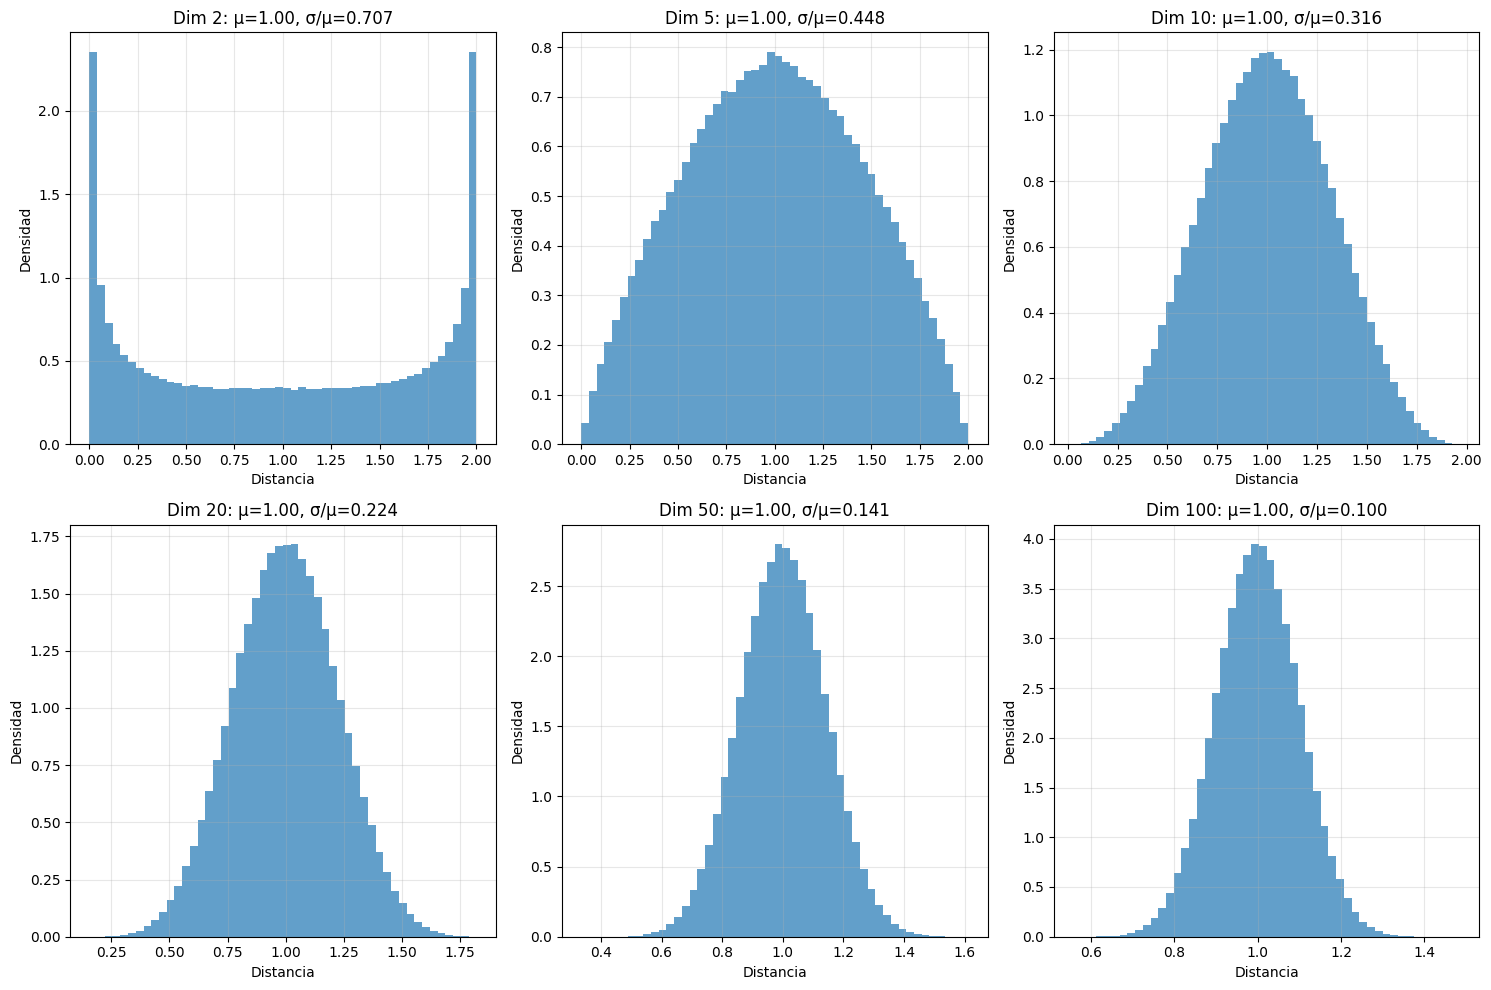

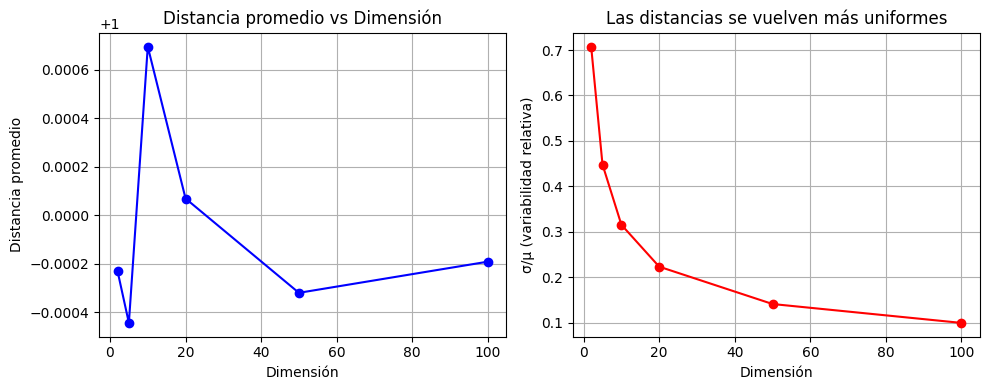

In [ ]:
#Veamos qué sucede cuando cambiamos la distancia euclideana a coseno

# Ejecutar
stats = curse_of_dimensionality_demo(metric="cosine")

Piense por qué ocurre esto?

También podemos ver lo que pasa al utilizar la distancia [Minkowsky](https://en.wikipedia.org/wiki/Minkowski_distance) con p < 1. Estos tipos de distancias se llaman distancias fraccionarias y son especialmente utiles para datos en altas dimensiones.

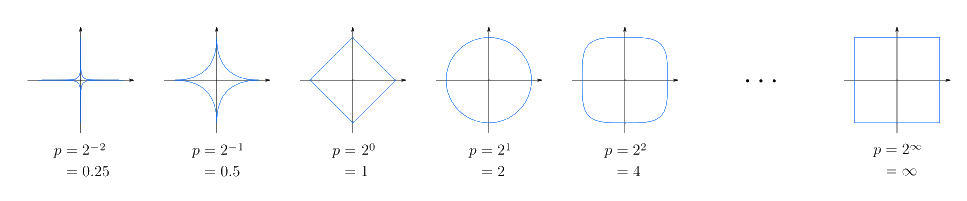

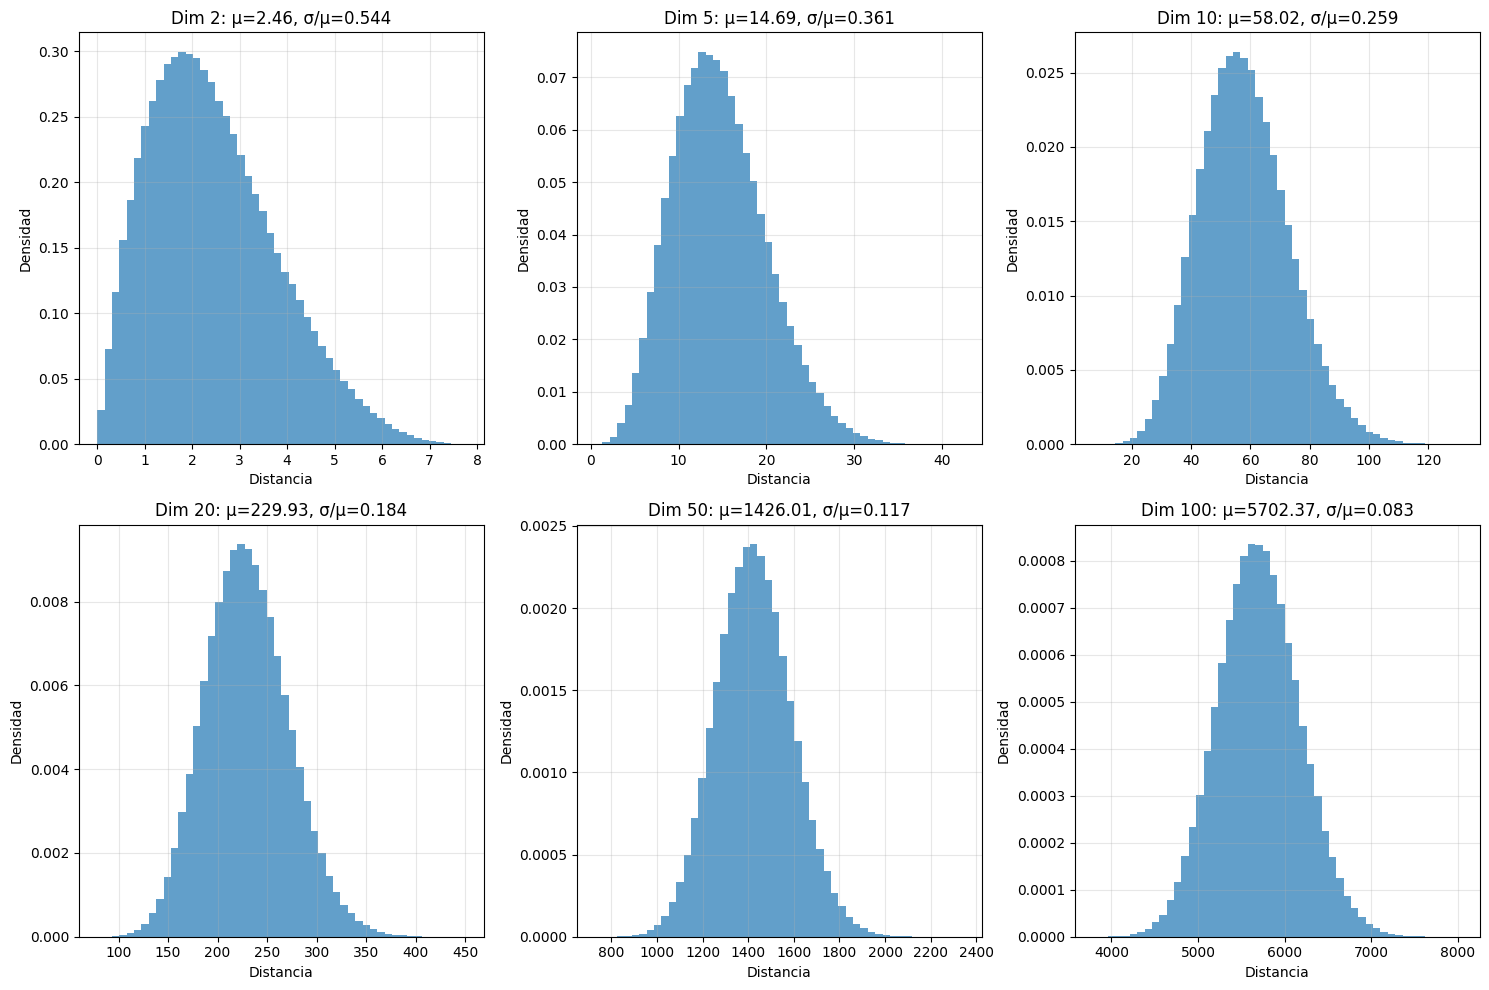

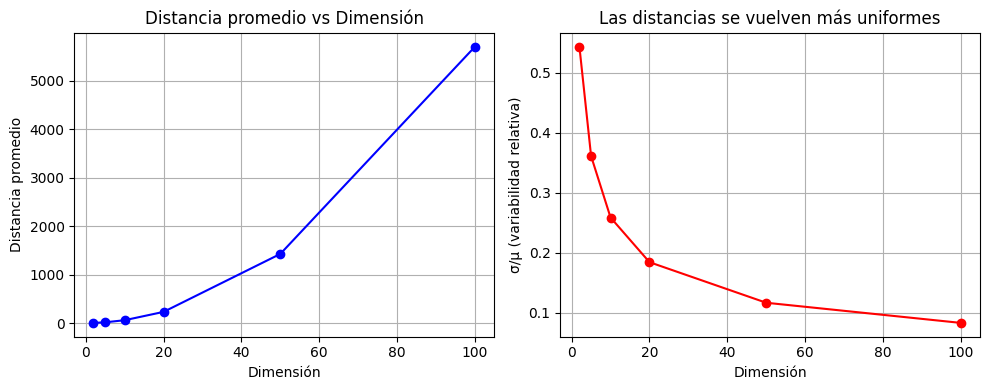

In [ ]:
#Veamos qué sucede cuando cambiamos la distancia euclideana por minkowsky con p < 1

# Ejecutar
stats = curse_of_dimensionality_demo(metric="minkowski", p=0.5)

Hemos visto cómo la elección de la distancia nos puede servir para combatir la maldición de la dimensionalidad.

#### Parte B: Volumen de hiperesfera vs hipercubo

* Calcular la proporción de volumen de una hiperesfera inscrita en un hipercubo, basado en [wikipedia](https://es.wikipedia.org/wiki/Volumen_de_una_n-bola)
* Mostrar cómo esta proporción tiende a 0 exponencialmente
* Visualizar para dimensiones 2-20



/tmp/ipython-input-1043677636.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = vol_sphere / vol_cube


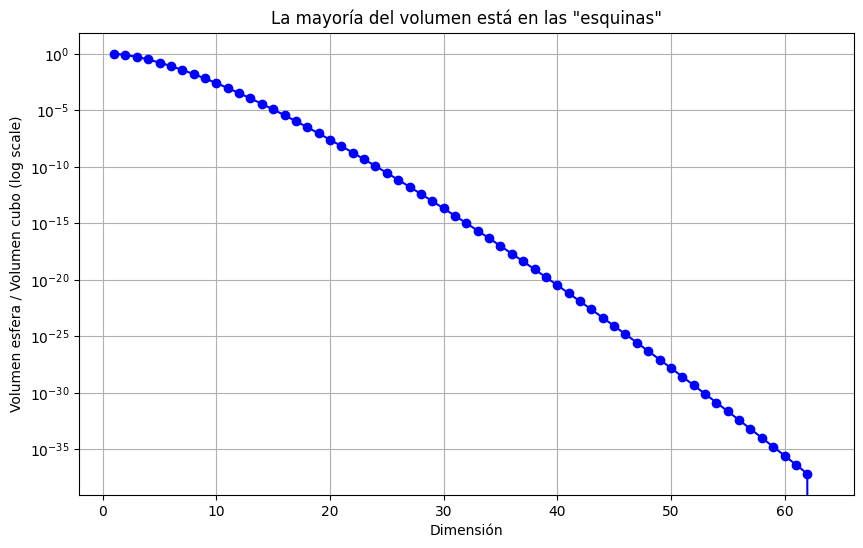

Dimensión 2: 7.85e-01 del volumen está en la esfera
Dimensión 5: 1.64e-01 del volumen está en la esfera
Dimensión 10: 2.49e-03 del volumen está en la esfera
Dimensión 20: 2.46e-08 del volumen está en la esfera


In [ ]:

def hypersphere_volume_demo():
    """Muestra cómo el volumen se concentra en las esquinas en alta dimensión"""

    dims = np.arange(1, 100)
    # Volumen de hiperesfera de radio 1 inscrita en hipercubo de lado 2
    volumes_ratio = []

    for d in dims:
        # Volumen hiperesfera radio 1: π^(d/2) / Γ(d/2 + 1)
        if d % 2 == 0:
            # Dimensión par
            vol_sphere = np.pi**(d/2) / np.math.factorial(d//2)
        else:
            # Dimensión impar
            vol_sphere = 2 * np.math.factorial((d-1)//2) * (4*np.pi)**((d-1)//2) / np.math.factorial(d)

        # Volumen hipercubo lado 2
        vol_cube = 2**d

        ratio = vol_sphere / vol_cube
        volumes_ratio.append(ratio)

    plt.figure(figsize=(10, 6))
    plt.semilogy(dims, volumes_ratio, 'bo-')
    plt.xlabel('Dimensión')
    plt.ylabel('Volumen esfera / Volumen cubo (log scale)')
    plt.title('La mayoría del volumen está en las "esquinas"')
    plt.grid(True)
    plt.show()

    # Mostrar algunos valores
    for i in [1, 4, 9, 19]:  # dims 2, 5, 10, 20
        vol = '{:.2e}'.format(volumes_ratio[i])
        print(f"Dimensión {dims[i]}: {vol} del volumen está en la esfera")

hypersphere_volume_demo()

## Reducción de dimensiones básica

### Parte A. Generación de Datos con Estructura de Manifold
    
Objetivo: Crear datasets sintéticos que vivan en manifolds de baja dimensión para experimentar.
Datasets a generar:

* Swiss Roll (manifold 2D embebido en 3D)
* S-Curve (manifold 1D embebido en 3D)
* Círculo ruidoso (manifold 1D embebido en 2D)
* Toro (manifold 2D embebido en 3D)
* Plano Inclinado (manifold 2D embebido en 3D)
* Datos "no-manifold" (ruido gaussiano puro)

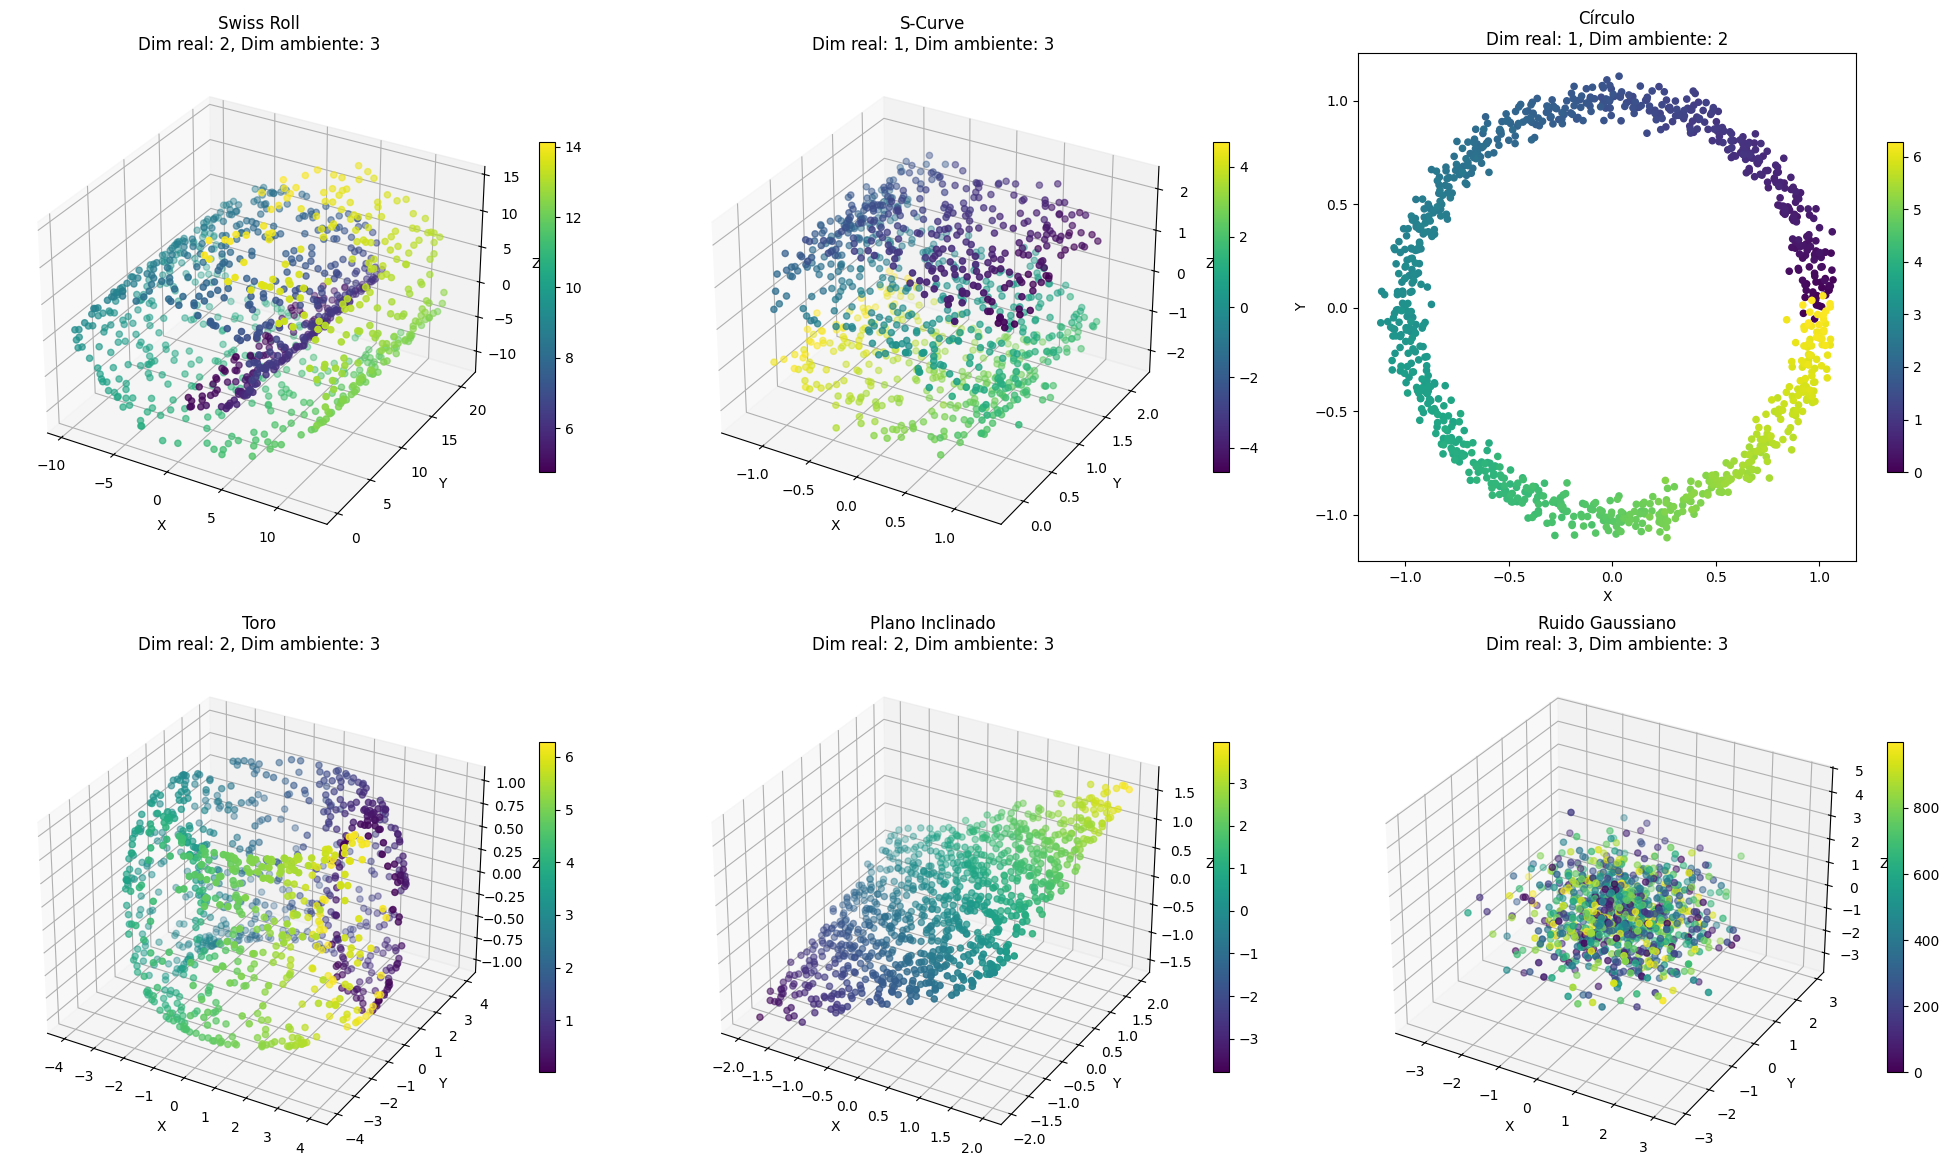

In [ ]:
from sklearn.datasets import make_swiss_roll, make_s_curve
from mpl_toolkits.mplot3d import Axes3D

def create_manifold_datasets():
    """Crea varios datasets con estructura de manifold conocida"""

    np.random.seed(42)
    datasets = {}

    # 1. Swiss Roll (2D → 3D)
    X_swiss, color_swiss = make_swiss_roll(n_samples=1000, noise=0.1)
    datasets['Swiss Roll'] = {
        'data': X_swiss,
        'colors': color_swiss,
        'true_dim': 2,
        'ambient_dim': 3
    }

    # 2. S-Curve (1D → 3D)
    X_scurve, color_scurve = make_s_curve(n_samples=1000, noise=0.1)
    datasets['S-Curve'] = {
        'data': X_scurve,
        'colors': color_scurve,
        'true_dim': 1,
        'ambient_dim': 3
    }

    # 3. Círculo ruidoso (1D → 2D)
    n_samples = 1000
    theta = np.linspace(0, 2*np.pi, n_samples)
    noise = np.random.normal(0, 0.05, (n_samples, 2))
    circle_data = np.column_stack([np.cos(theta), np.sin(theta)]) + noise
    datasets['Círculo'] = {
        'data': circle_data,
        'colors': theta,
        'true_dim': 1,
        'ambient_dim': 2
    }

    # 4. Toro (2D → 3D)
    n_samples = 1000
    u = np.random.uniform(0, 2*np.pi, n_samples)
    v = np.random.uniform(0, 2*np.pi, n_samples)
    R, r = 3, 1
    x = (R + r*np.cos(v)) * np.cos(u)
    y = (R + r*np.cos(v)) * np.sin(u)
    z = r * np.sin(v)
    torus_data = np.column_stack([x, y, z])
    datasets['Toro'] = {
        'data': torus_data,
        'colors': u,
        'true_dim': 2,
        'ambient_dim': 3
    }

    # 5. Plano inclinado con ruido (2D → 3D)
    n_samples = 1000
    u = np.random.uniform(-2, 2, n_samples)
    v = np.random.uniform(-2, 2, n_samples)
    x = u
    y = v
    z = 0.5*u + 0.3*v + 0.1*np.random.normal(0, 1, n_samples)
    plane_data = np.column_stack([x, y, z])
    datasets['Plano Inclinado'] = {
        'data': plane_data,
        'colors': u + v,
        'true_dim': 2,
        'ambient_dim': 3
    }

    # 6. Control negativo: Ruido gaussiano
    gaussian_data = np.random.normal(0, 1, (1000, 3))
    datasets['Ruido Gaussiano'] = {
        'data': gaussian_data,
        'colors': np.arange(1000),
        'true_dim': 3,
        'ambient_dim': 3
    }

    return datasets

def visualize_datasets():
    """Visualiza todos los datasets sintéticos"""
    datasets = create_manifold_datasets()

    n_datasets = len(datasets)
    fig = plt.figure(figsize=(20, 12))

    for i, (name, dataset) in enumerate(datasets.items()):
        data = dataset['data']
        colors = dataset['colors']
        true_dim = dataset['true_dim']
        ambient_dim = dataset['ambient_dim']

        if ambient_dim == 3:
            ax = fig.add_subplot(2, 3, i+1, projection='3d')
            scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2],
                               c=colors, cmap='viridis', s=20)
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')
        else:
            ax = fig.add_subplot(2, 3, i+1)
            scatter = ax.scatter(data[:, 0], data[:, 1],
                               c=colors, cmap='viridis', s=20)
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_aspect('equal')

        ax.set_title(f'{name}\nDim real: {true_dim}, Dim ambiente: {ambient_dim}')
        plt.colorbar(scatter, ax=ax, shrink=0.6)

    plt.tight_layout()
    plt.show()

    return datasets

# Ejecutar
datasets = visualize_datasets()

### Parte B. Comparación de Métodos de Reducción de Dimensionalidad

Objetivo: Comparar métodos lineales vs no-lineales en datasets con diferentes estructuras geométricas.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


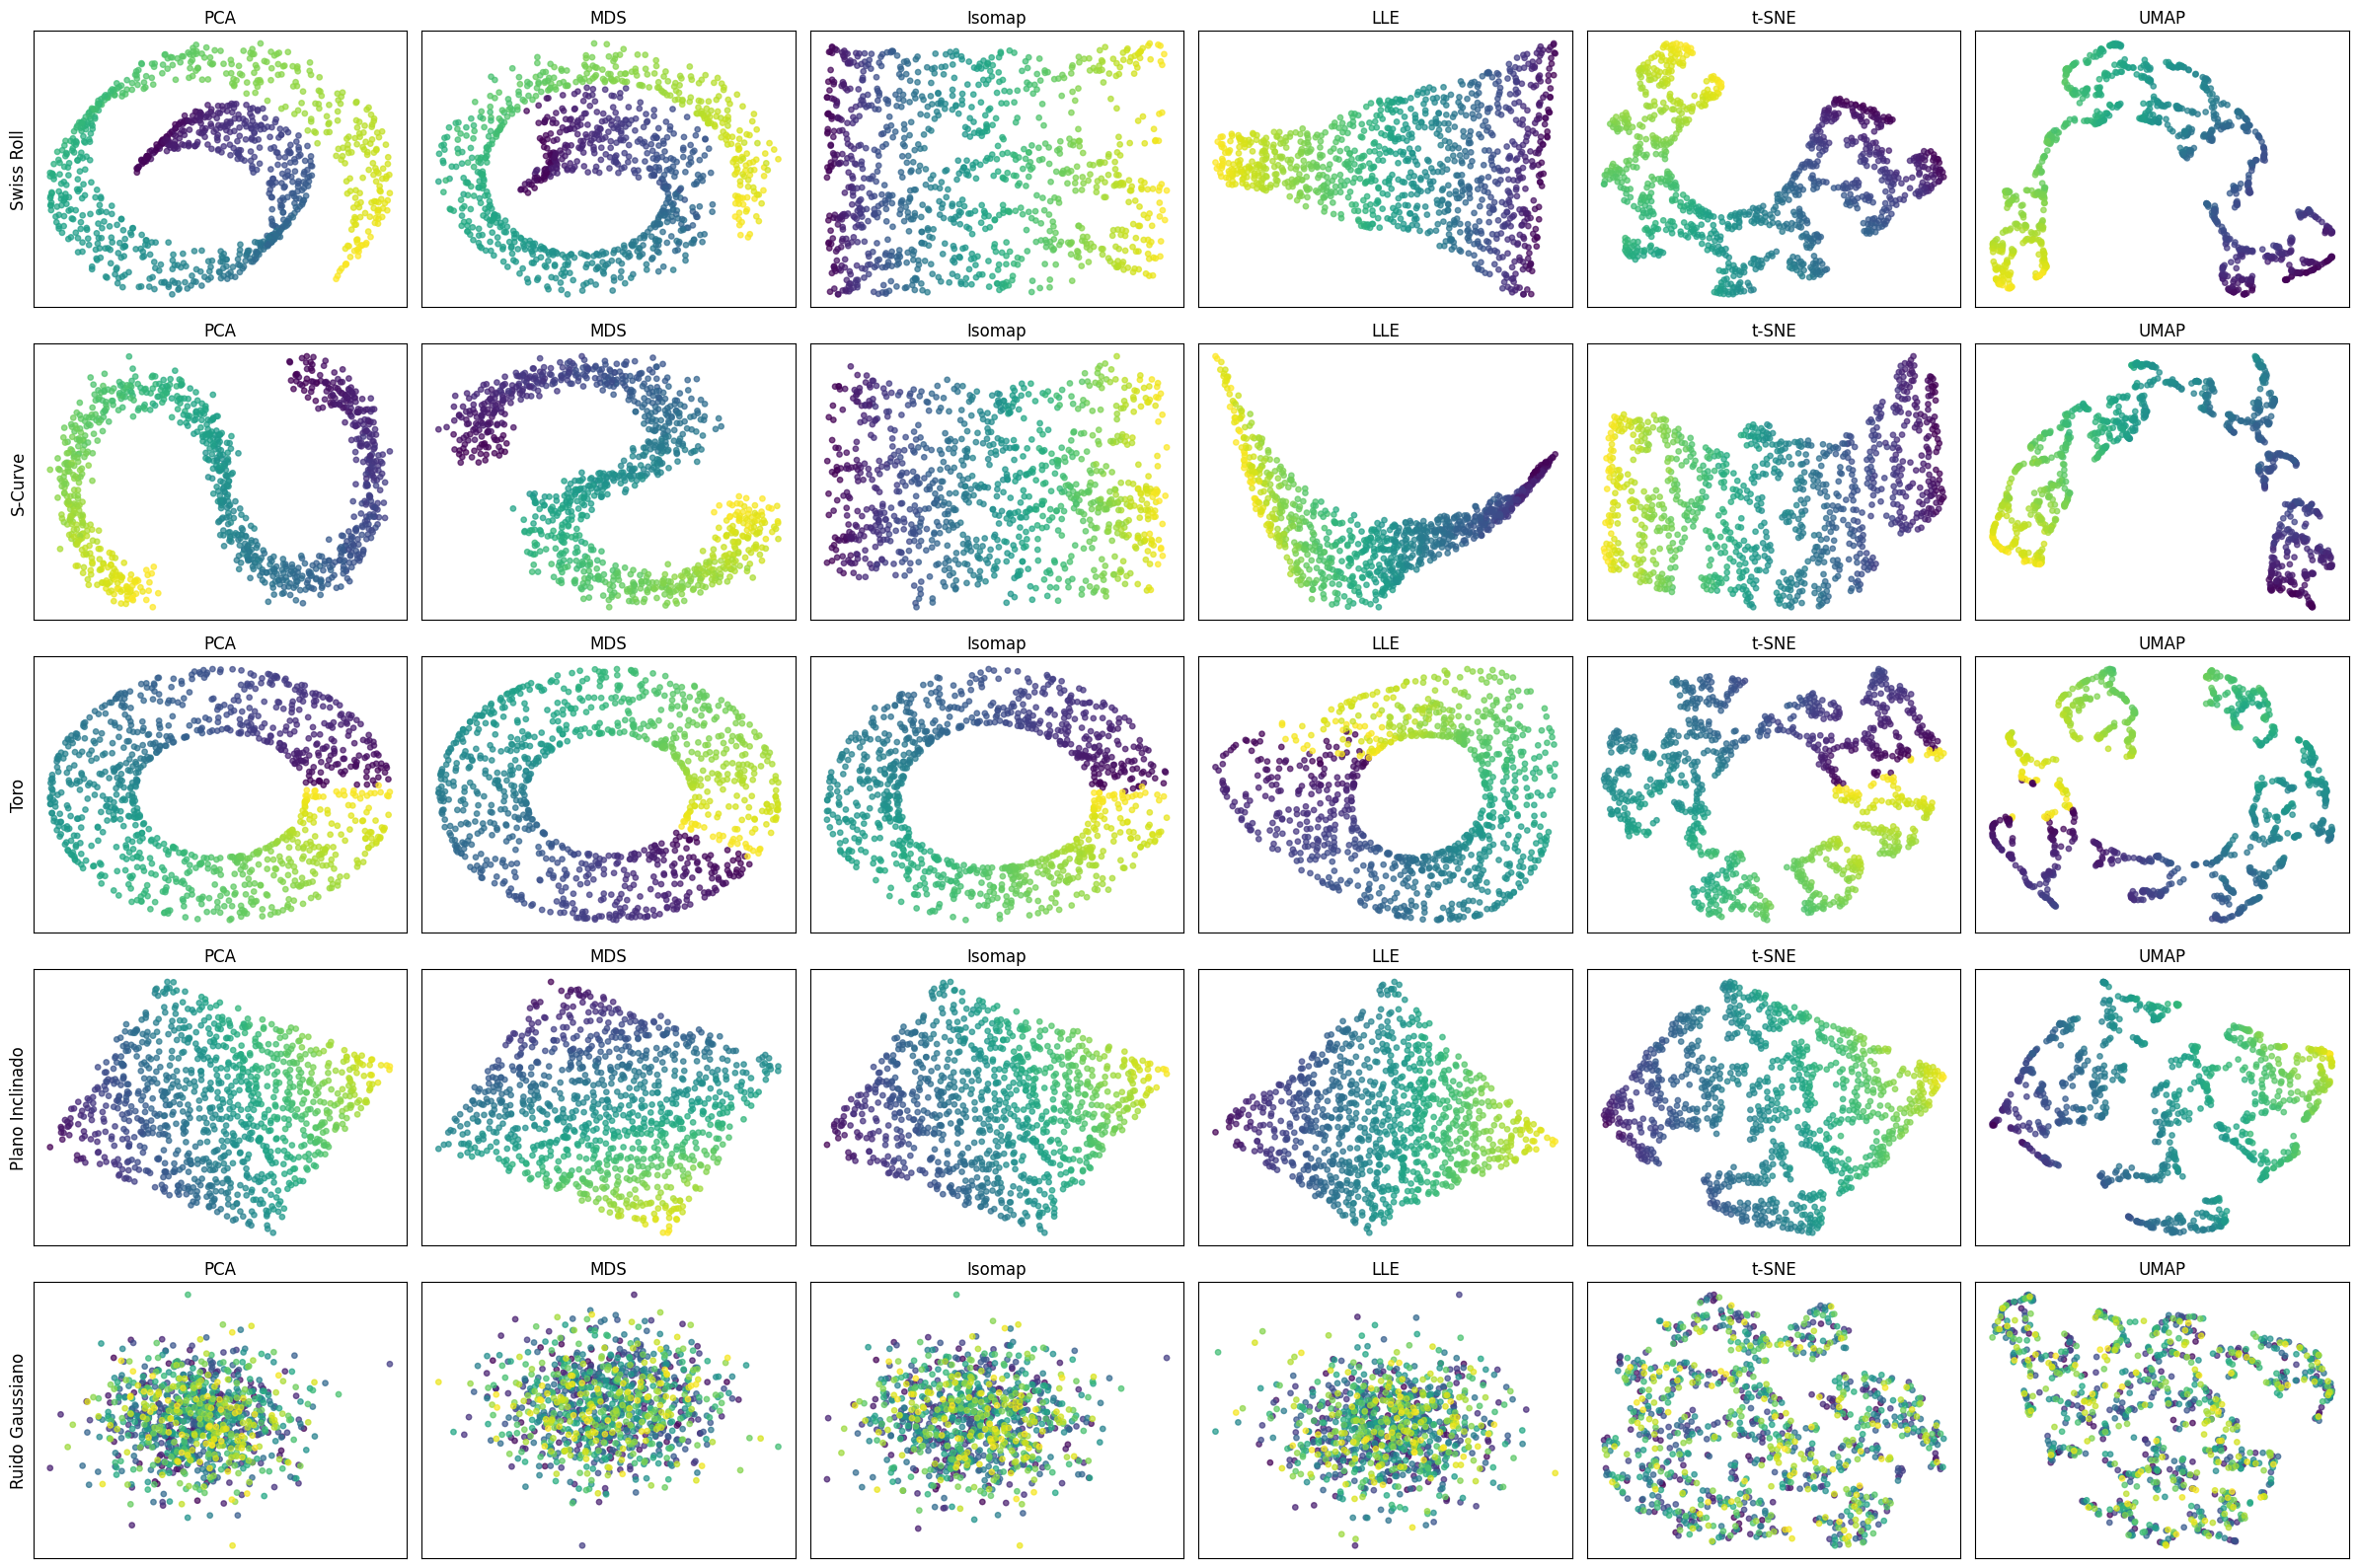

MÉTRICAS DE PRESERVACIÓN - SWISS ROLL
Método          Preservación Local   Stress Global  
------------------------------------------------------------
PCA             0.485                0.268          
MDS             0.535                0.216          
Isomap          0.879                1.689          
LLE             0.640                0.996          


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP            0.775                0.548          


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS, Isomap, LocallyLinearEmbedding
from sklearn.metrics import pairwise_distances
import umap

def compare_dimensionality_reduction():
    """Compara diferentes métodos de reducción de dimensionalidad"""

    # Métodos a comparar
    methods = {
        'PCA': PCA(n_components=2),
        'MDS': MDS(n_components=2, random_state=42),
        'Isomap': Isomap(n_components=2, n_neighbors=12),
        'LLE': LocallyLinearEmbedding(n_components=2, n_neighbors=12, random_state=42),
        't-SNE': TSNE(n_components=2, random_state=42, perplexity=30),
        'UMAP': umap.umap_.UMAP(n_components=2, random_state=42, n_neighbors=15)
    }

    datasets = create_manifold_datasets()

    # Solo usar datasets 3D para visualización clara
    datasets_3d = {name: data for name, data in datasets.items()
                   if data['ambient_dim'] == 3}

    n_methods = len(methods)
    n_datasets = len(datasets_3d)

    fig, axes = plt.subplots(n_datasets, n_methods, figsize=(24, 16))

    for i, (dataset_name, dataset) in enumerate(datasets_3d.items()):
        X = dataset['data']
        colors = dataset['colors']

        for j, (method_name, method) in enumerate(methods.items()):
            ax = axes[i, j]

            try:
                # Aplicar reducción de dimensionalidad
                X_reduced = method.fit_transform(X)

                # Visualizar
                scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1],
                                   c=colors, cmap='viridis', s=15, alpha=0.7)

                ax.set_title(f'{method_name}')
                if j == 0:
                    ax.set_ylabel(f'{dataset_name}', rotation=90, size=12)

                # Remover ticks para claridad
                ax.set_xticks([])
                ax.set_yticks([])

            except Exception as e:
                ax.text(0.5, 0.5, f'Error:\n{str(e)[:50]}...',
                       transform=ax.transAxes, ha='center', va='center',
                       fontsize=8, bbox=dict(boxstyle="round,pad=0.3", facecolor="red", alpha=0.3))
                ax.set_title(f'{method_name} (Failed)')

    plt.tight_layout()
    plt.show()

def preservation_metrics():
    """Calcula métricas de preservación de estructura"""

    def local_preservation(X_orig, X_reduced, k=10):
        """Mide qué tan bien se preservan las relaciones locales"""
        n_samples = X_orig.shape[0]

        # Encontrar k vecinos más cercanos en espacio original
        nbrs_orig = NearestNeighbors(n_neighbors=k+1).fit(X_orig)
        _, indices_orig = nbrs_orig.kneighbors(X_orig)

        # Encontrar k vecinos más cercanos en espacio reducido
        nbrs_reduced = NearestNeighbors(n_neighbors=k+1).fit(X_reduced)
        _, indices_reduced = nbrs_reduced.kneighbors(X_reduced)

        # Calcular overlap promedio
        overlaps = []
        for i in range(n_samples):
            neighbors_orig = set(indices_orig[i, 1:])  # Excluir el punto mismo
            neighbors_reduced = set(indices_reduced[i, 1:])
            overlap = len(neighbors_orig & neighbors_reduced) / k
            overlaps.append(overlap)

        return np.mean(overlaps)

    def stress_metric(X_orig, X_reduced):
        """Calcula el stress (preservación de distancias globales)"""
        dist_orig = pairwise_distances(X_orig)
        dist_reduced = pairwise_distances(X_reduced)

        # Normalizar distancias
        dist_orig_flat = dist_orig.flatten()
        dist_reduced_flat = dist_reduced.flatten()

        # Stress de Kruskal
        numerator = np.sum((dist_orig_flat - dist_reduced_flat)**2)
        denominator = np.sum(dist_orig_flat**2)
        stress = np.sqrt(numerator / denominator)

        return stress

    # Evaluar en Swiss Roll (caso paradigmático)
    datasets = create_manifold_datasets()
    X = datasets['Swiss Roll']['data']

    methods = {
        'PCA': PCA(n_components=2),
        'MDS': MDS(n_components=2, random_state=42, n_jobs=-1),
        'Isomap': Isomap(n_components=2, n_neighbors=12, n_jobs=-1),
        'LLE': LocallyLinearEmbedding(n_components=2, n_neighbors=12, random_state=42, n_jobs=-1),
        'UMAP': umap.UMAP(n_components=2, random_state=42, n_neighbors=15, n_jobs=-1)
    }

    print("="*60)
    print("MÉTRICAS DE PRESERVACIÓN - SWISS ROLL")
    print("="*60)
    print(f"{'Método':<15} {'Preservación Local':<20} {'Stress Global':<15}")
    print("-" * 60)

    results = {}
    for method_name, method in methods.items():
        try:
            X_reduced = method.fit_transform(X)

            local_pres = local_preservation(X, X_reduced, k=10)
            stress = stress_metric(X, X_reduced)

            print(f"{method_name:<15} {local_pres:<20.3f} {stress:<15.3f}")

            results[method_name] = {
                'local_preservation': local_pres,
                'stress': stress,
                'reduced_data': X_reduced
            }
        except Exception as e:
            print(f"{method_name:<15} ERROR: {str(e)[:30]}...")

    return results

# Ejecutar experimentos
compare_dimensionality_reduction()
metrics_results = preservation_metrics()

# Estimación de Dimensión Intrínseca y la Hipótesis del Manifold

* Objetivo: Entender qué significa la "dimensión intrínseca" de los datos y cómo estimarla, sentando las bases para la hipótesis del manifold.
* Contenido:
    - Generación de Manifolds Simples: Utilizaremos los mismos datos sintéticos anteriores con dimensión intrínseca específica (ej., puntos en un círculo 1D, en una esfera 2D, o en una superficie plana 2D, todos incrustados en 3D).
    - Estimación de la Dimensión Intrínseca: Aplicar un estimador de dimensión intrínseca, como el método de Levina & Bickel (2004), a estos conjuntos de datos.
        + Compara los resultados estimados con la dimensión real conocida.
        + Explora el efecto del hiperparámetro k (número de vecinos más cercanos) en la estimación.
    - Datos Reales (primer vistazo): Toma un subconjunto de un dataset de imágenes (ej., algunas imágenes de dígitos '0, 1, 2, 8' de MNIST) y estima su dimensión intrínseca. Discute cómo esto sugiere que incluso datos complejos pueden tener una estructura de baja dimensión.
* Conexión con las Fuentes: La hipótesis del manifold postula que los datos yacen en una variedad de baja dimensión. La estimación de la dimensión intrínseca es clave para verificar esto. Este experimento también introduce la noción de "factores de variación".
* Herramientas Prácticas: Python con numpy, scikit-learn.datasets para datos sintéticos, y una implementación del estimador de Levina & Bickel.


## Estimación de Dimensión Intrínseca

Objetivo: Implementar métodos simples para estimar la dimensión intrínseca y validar en datasets conocidos.


ESTIMACIÓN DE DIMENSIÓN INTRÍNSECA

Swiss Roll (Dimensión real: 2)
--------------------------------------------------
Levina-Bickel (k= 5): -2.66
Levina-Bickel (k=10): -2.19
Levina-Bickel (k=15): -2.10
Levina-Bickel (k=20): -2.06
PCA (95% varianza):      3
Top 5 componentes PCA:   [0.40772104 0.30229948 0.28997948]

S-Curve (Dimensión real: 1)
--------------------------------------------------
Levina-Bickel (k= 5): -3.73
Levina-Bickel (k=10): -3.02
Levina-Bickel (k=15): -2.76
Levina-Bickel (k=20): -2.62
PCA (95% varianza):      3
Top 5 componentes PCA:   [0.69975446 0.17847355 0.12177199]

Círculo (Dimensión real: 1)
--------------------------------------------------
Levina-Bickel (k= 5): -2.72
Levina-Bickel (k=10): -2.28
Levina-Bickel (k=15): -2.12
Levina-Bickel (k=20): -2.02
PCA (95% varianza):      2
Top 5 componentes PCA:   [0.50167206 0.49832794]

Toro (Dimensión real: 2)
--------------------------------------------------
Levina-Bickel (k= 5): -2.70
Levina-Bickel (k=10): -2.23
Lev

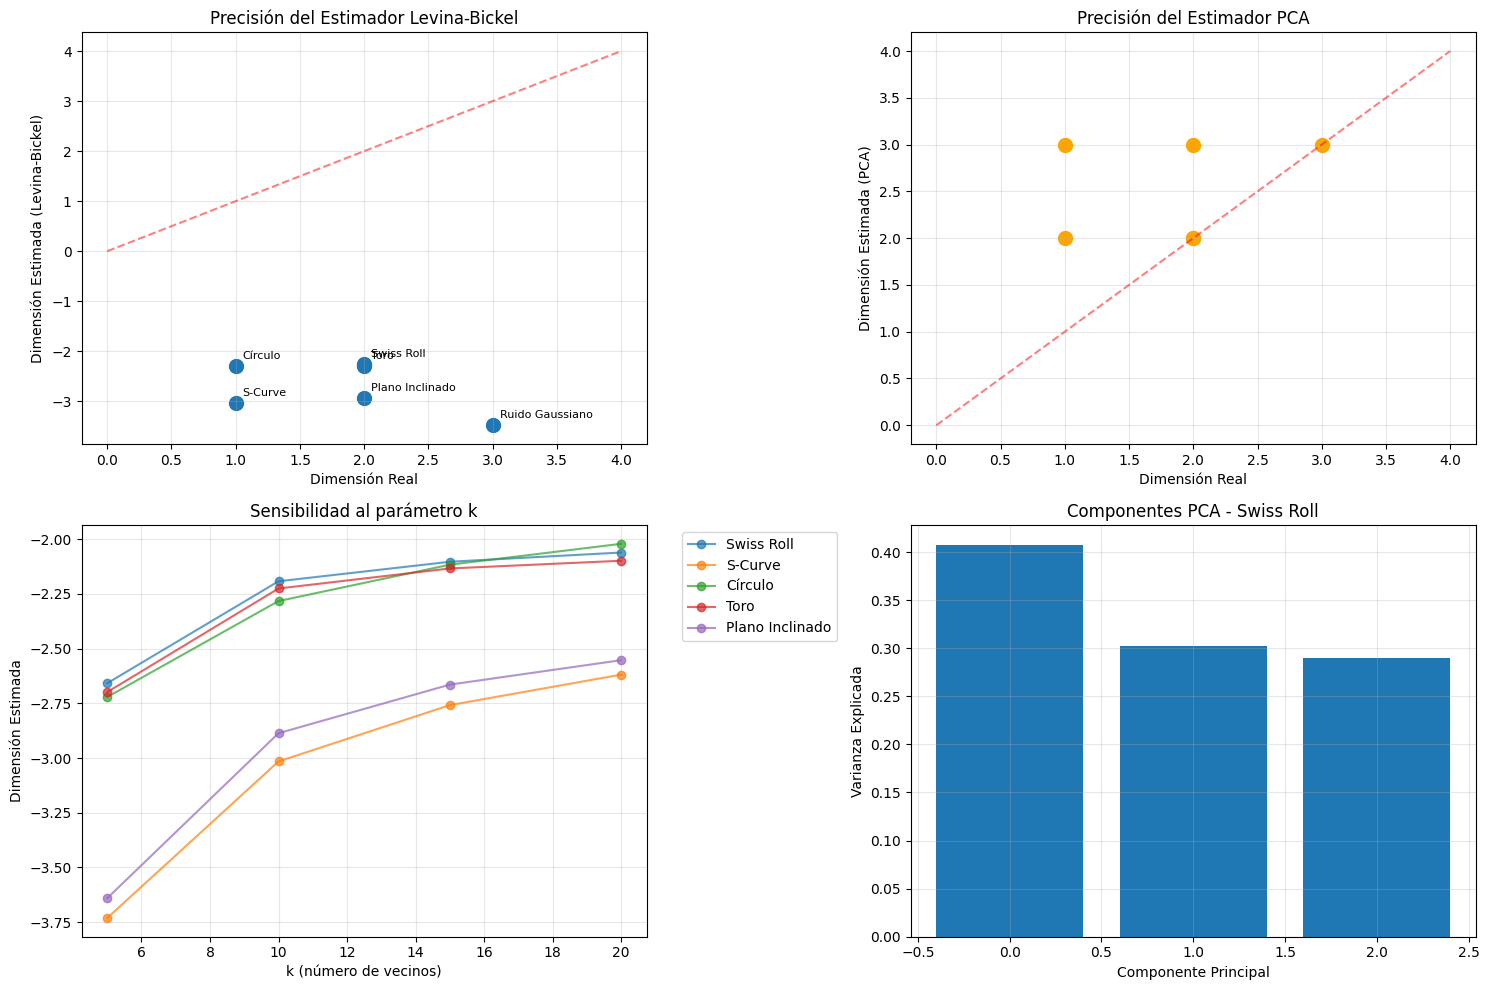

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

def levina_bickel_estimator(X, k=10):
    """
    Implementa el estimador Levina-Bickel para dimensión intrínseca
    (el mismo que usa el paper https://arxiv.org/abs/2207.02862)
    """
    n_samples = X.shape[0]

    # Encontrar k+1 vecinos más cercanos (incluye el punto mismo)
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(X)
    distances, indices = nbrs.kneighbors(X)

    # Remover distancia a sí mismo (primera columna, que es 0)
    distances = distances[:, 1:]

    estimates = []
    for i in range(n_samples):
        # Calcular ratios T_j / T_k para j = 1, ..., k-1
        ratios = distances[i, :-1] / distances[i, -1]

        # Evitar log(0)
        ratios = np.maximum(ratios, 1e-10)
        log_ratios = np.log(ratios)

        # Estimación para este punto
        estimate = (k-1) / np.sum(log_ratios) if np.sum(log_ratios) != 0 else k-1
        estimates.append(estimate)

    return np.mean(estimates)

def pca_intrinsic_dimension(X, explained_variance_threshold=0.95):
    """Estima dimensión intrínseca usando PCA"""
    pca = PCA()
    pca.fit(X)

    cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
    intrinsic_dim = np.argmax(cumsum_variance >= explained_variance_threshold) + 1

    return intrinsic_dim, pca.explained_variance_ratio_

def test_dimension_estimation():
    """Prueba métodos de estimación en datasets conocidos"""
    datasets = create_manifold_datasets()

    k_values = [5, 10, 15, 20]

    print("="*80)
    print("ESTIMACIÓN DE DIMENSIÓN INTRÍNSECA")
    print("="*80)

    results = {}

    for name, dataset in datasets.items():
        X = dataset['data']
        true_dim = dataset['true_dim']

        print(f"\n{name} (Dimensión real: {true_dim})")
        print("-" * 50)

        # Levina-Bickel con diferentes k
        lb_estimates = []
        for k in k_values:
            estimate = levina_bickel_estimator(X, k)
            lb_estimates.append(estimate)
            print(f"Levina-Bickel (k={k:2d}): {estimate:.2f}")

        # PCA
        pca_dim, explained_var = pca_intrinsic_dimension(X)
        print(f"PCA (95% varianza):      {pca_dim}")
        print(f"Top 5 componentes PCA:   {explained_var[:5]}")

        results[name] = {
            'true_dim': true_dim,
            'levina_bickel': lb_estimates,
            'pca_dim': pca_dim,
            'explained_variance': explained_var
        }

    return results

def plot_dimension_estimation_results(results):
    """Visualiza resultados de estimación de dimensión"""

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Gráfico 1: Levina-Bickel vs dimensión real
    names = list(results.keys())
    true_dims = [results[name]['true_dim'] for name in names]
    lb_dims = [np.mean(results[name]['levina_bickel']) for name in names]

    axes[0,0].scatter(true_dims, lb_dims, s=100)
    axes[0,0].plot([0, max(true_dims)+1], [0, max(true_dims)+1], 'r--', alpha=0.5)
    axes[0,0].set_xlabel('Dimensión Real')
    axes[0,0].set_ylabel('Dimensión Estimada (Levina-Bickel)')
    axes[0,0].set_title('Precisión del Estimador Levina-Bickel')
    axes[0,0].grid(True, alpha=0.3)

    for i, name in enumerate(names):
        axes[0,0].annotate(name, (true_dims[i], lb_dims[i]),
                          xytext=(5, 5), textcoords='offset points', fontsize=8)

    # Gráfico 2: PCA vs dimensión real
    pca_dims = [results[name]['pca_dim'] for name in names]

    axes[0,1].scatter(true_dims, pca_dims, s=100, color='orange')
    axes[0,1].plot([0, max(true_dims)+1], [0, max(true_dims)+1], 'r--', alpha=0.5)
    axes[0,1].set_xlabel('Dimensión Real')
    axes[0,1].set_ylabel('Dimensión Estimada (PCA)')
    axes[0,1].set_title('Precisión del Estimador PCA')
    axes[0,1].grid(True, alpha=0.3)

    # Gráfico 3: Variabilidad de Levina-Bickel con k
    k_values = [5, 10, 15, 20]
    for name in names:
        if name != 'Ruido Gaussiano':  # Destacar casos interesantes
            estimates = results[name]['levina_bickel']
            axes[1,0].plot(k_values, estimates, 'o-', label=name, alpha=0.7)

    axes[1,0].set_xlabel('k (número de vecinos)')
    axes[1,0].set_ylabel('Dimensión Estimada')
    axes[1,0].set_title('Sensibilidad al parámetro k')
    axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1,0].grid(True, alpha=0.3)

    # Gráfico 4: Varianza explicada por componente (ejemplo)
    example_name = 'Swiss Roll'
    explained_var = results[example_name]['explained_variance'][:10]
    axes[1,1].bar(range(len(explained_var)), explained_var)
    axes[1,1].set_xlabel('Componente Principal')
    axes[1,1].set_ylabel('Varianza Explicada')
    axes[1,1].set_title(f'Componentes PCA - {example_name}')
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Ejecutar
results = test_dimension_estimation()
plot_dimension_estimation_results(results)

## Hipótesis de la Unión de Manifolds

Objetivo: Demostrar que datasets pueden consistir de múltiples manifolds de diferentes dimensiones.

* Creamos un dataset compuesto por varios manifolds (Círculo, Plano, Línea)
* Analizamos la hipótesis de la unión de manifolds

ANÁLISIS UNION OF MANIFOLDS
Dimensión estimada GLOBAL: -2.23

Dimensiones por componente:
----------------------------------------
Círculo   : Real=1, Estimada=-2.75
Plano     : Real=2, Estimada=-2.59
Línea     : Real=1, Estimada=-2.51


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


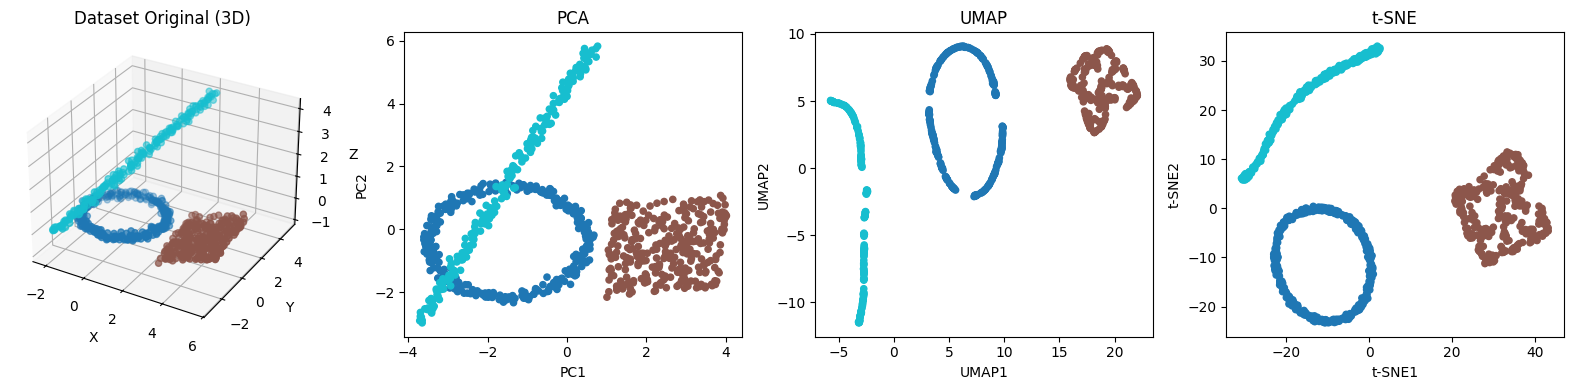

In [ ]:
def create_multi_manifold_dataset():
    """Crea un dataset que combina manifolds de diferentes dimensiones"""

    np.random.seed(42)

    # Manifold 1: Círculo (1D)
    n1 = 300
    theta = np.linspace(0, 2*np.pi, n1)
    circle = np.column_stack([
        2 * np.cos(theta) + 0.1*np.random.normal(0, 1, n1),
        2 * np.sin(theta) + 0.1*np.random.normal(0, 1, n1),
        0.1*np.random.normal(0, 1, n1)  # Pequeño ruido en Z
    ])
    labels1 = np.zeros(n1)

    # Manifold 2: Plano (2D)
    n2 = 300
    u = np.random.uniform(-1.5, 1.5, n2)
    v = np.random.uniform(-1.5, 1.5, n2)
    plane = np.column_stack([
        u + 4,  # Desplazar para separar del círculo
        v,
        0.3*u + 0.2*v + 0.1*np.random.normal(0, 1, n2)
    ])
    labels2 = np.ones(n2)

    # Manifold 3: Línea (1D)
    n3 = 200
    t = np.linspace(-2, 2, n3)
    line = np.column_stack([
        t + np.random.normal(0, 0.1, n3),
        2*t + 1 + np.random.normal(0, 0.1, n3),
        t + 2 + np.random.normal(0, 0.1, n3)
    ])
    labels3 = np.full(n3, 2)

    # Combinar todo
    X = np.vstack([circle, plane, line])
    y = np.hstack([labels1, labels2, labels3])

    component_info = {
        0: {'name': 'Círculo', 'true_dim': 1, 'n_samples': n1},
        1: {'name': 'Plano', 'true_dim': 2, 'n_samples': n2},
        2: {'name': 'Línea', 'true_dim': 1, 'n_samples': n3}
    }

    return X, y, component_info

def analyze_union_of_manifolds():
    """Analiza el dataset multi-manifold"""

    X, y, component_info = create_multi_manifold_dataset()

    print("="*60)
    print("ANÁLISIS UNION OF MANIFOLDS")
    print("="*60)

    # Estimación global
    global_dim = levina_bickel_estimator(X, k=15)
    print(f"Dimensión estimada GLOBAL: {global_dim:.2f}")
    print()

    # Estimación por componente
    print("Dimensiones por componente:")
    print("-" * 40)

    estimated_dims = {}
    for label in np.unique(y):
        X_component = X[y == label]
        estimated_dim = levina_bickel_estimator(X_component, k=10)
        true_dim = component_info[label]['true_dim']
        name = component_info[label]['name']

        print(f"{name:<10}: Real={true_dim}, Estimada={estimated_dim:.2f}")
        estimated_dims[label] = estimated_dim

    # Visualización
    fig = plt.figure(figsize=(16, 4))

    # Vista 3D original
    ax1 = fig.add_subplot(141, projection='3d')
    scatter = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='tab10', s=20)
    ax1.set_title('Dataset Original (3D)')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')

    # PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    ax2 = fig.add_subplot(142)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', s=20)
    ax2.set_title('PCA')
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')

    # UMAP
    umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15)
    X_umap = umap_reducer.fit_transform(X)
    ax3 = fig.add_subplot(143)
    ax3.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10', s=20)
    ax3.set_title('UMAP')
    ax3.set_xlabel('UMAP1')
    ax3.set_ylabel('UMAP2')

    # t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    X_tsne = tsne.fit_transform(X)
    ax4 = fig.add_subplot(144)
    ax4.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=20)
    ax4.set_title('t-SNE')
    ax4.set_xlabel('t-SNE1')
    ax4.set_ylabel('t-SNE2')

    plt.tight_layout()
    plt.show()

    return X, y, component_info, estimated_dims

# Ejecutar
X, y, component_info, estimated_dims = analyze_union_of_manifolds()

## Comparación de Robustez al Ruido
Objetivo: Evaluar cómo diferentes métodos manejan ruido en los datos.

ANÁLISIS DE ROBUSTEZ AL RUIDO
Ruido 0.0: Dimensión estimada = -2.21


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Ruido 0.1: Dimensión estimada = -2.25
Ruido 0.3: Dimensión estimada = -2.41
Ruido 0.5: Dimensión estimada = -2.66
Ruido 0.8: Dimensión estimada = -2.88
Ruido 1.0: Dimensión estimada = -3.03


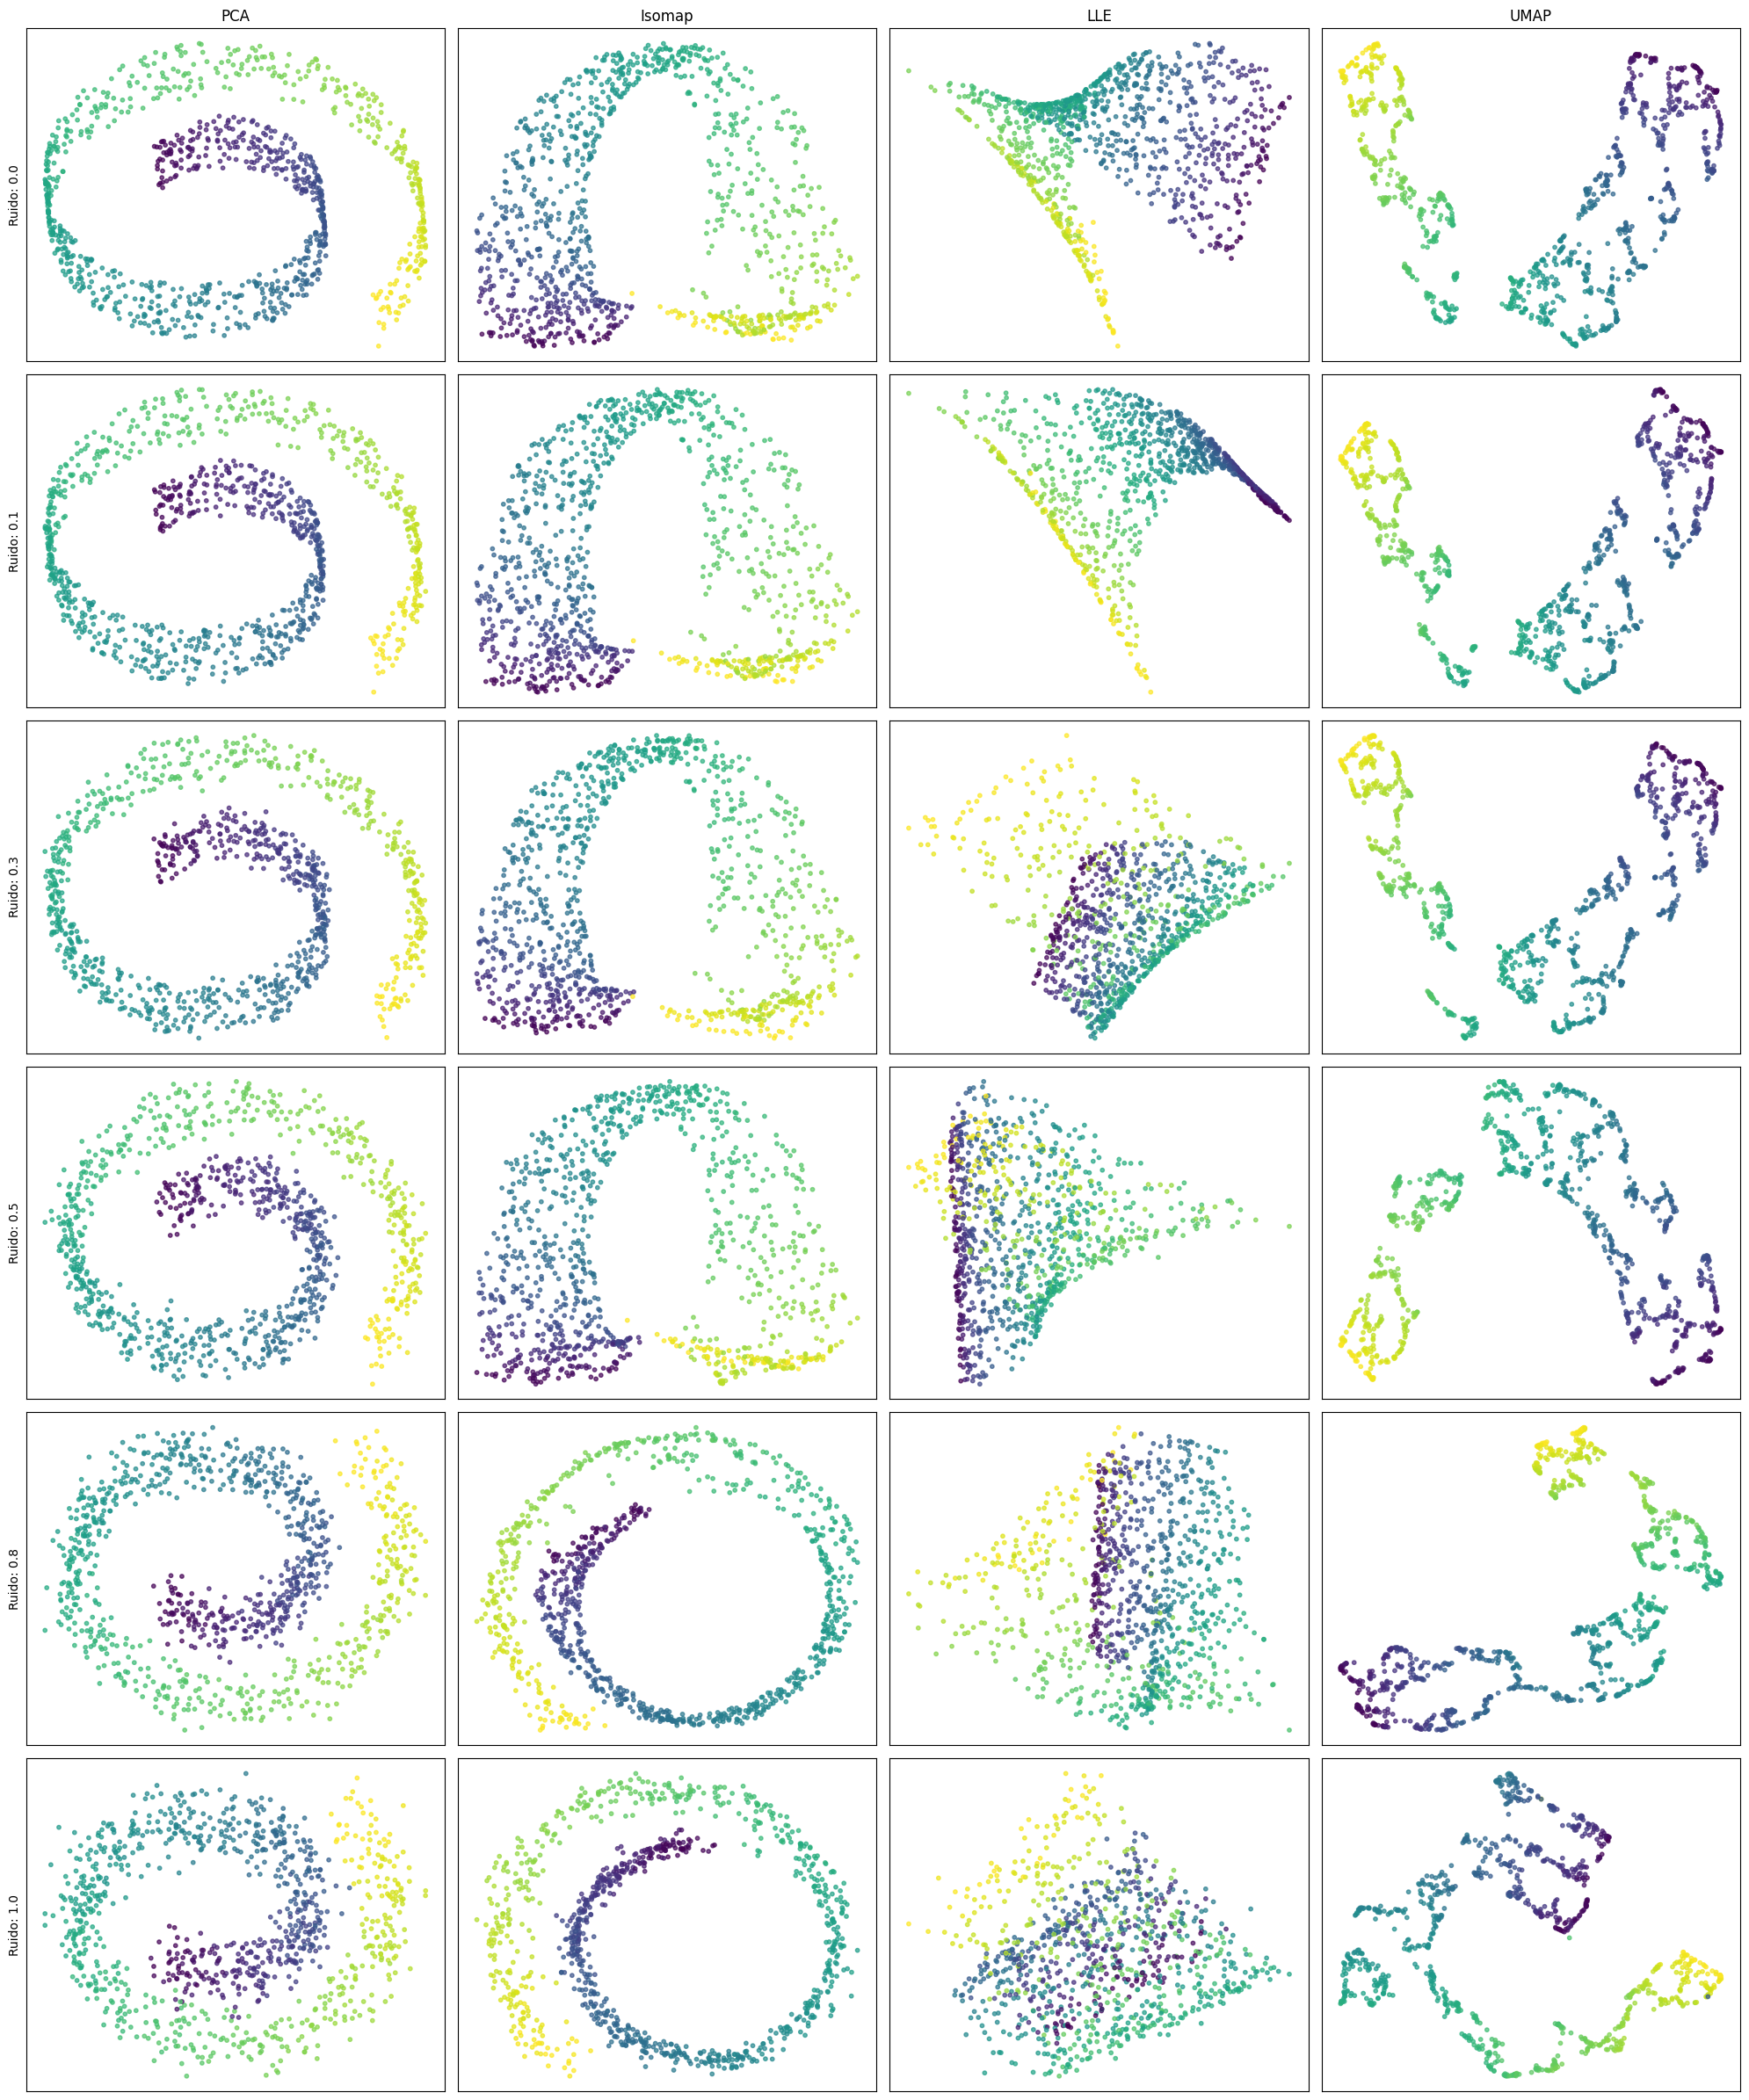

In [ ]:
def noise_robustness_experiment():
    """Evalúa robustez de métodos de reducción de dimensionalidad al ruido"""

    # Crear Swiss Roll limpio
    X_clean, color = make_swiss_roll(n_samples=1000, noise=0.0)

    # Diferentes niveles de ruido
    noise_levels = [0.0, 0.1, 0.3, 0.5, 0.8, 1.0]

    methods = {
        'PCA': PCA(n_components=2),
        'Isomap': Isomap(n_components=2, n_neighbors=12),
        'LLE': LocallyLinearEmbedding(n_components=2, n_neighbors=12, random_state=42),
        'UMAP': umap.UMAP(n_components=2, random_state=42, n_neighbors=15)
    }

    fig, axes = plt.subplots(len(noise_levels), len(methods), figsize=(20, 24))

    print("="*60)
    print("ANÁLISIS DE ROBUSTEZ AL RUIDO")
    print("="*60)

    for i, noise_level in enumerate(noise_levels):
        # Agregar ruido
        if noise_level > 0:
            noise = np.random.normal(0, noise_level, X_clean.shape)
            #X_noisy, color = make_swiss_roll(n_samples=1000, noise=noise_level)
            X_noisy = X_clean + noise
        else:
            X_noisy = X_clean.copy()

        # Estimar dimensión intrínseca
        estimated_dim = levina_bickel_estimator(X_noisy, k=10)
        print(f"Ruido {noise_level:.1f}: Dimensión estimada = {estimated_dim:.2f}")

        for j, (method_name, method) in enumerate(methods.items()):
            try:
                X_reduced = method.fit_transform(X_noisy)

                scatter = axes[i, j].scatter(X_reduced[:, 0], X_reduced[:, 1],
                                           c=color, cmap='viridis', s=10, alpha=0.7)

                if i == 0:
                    axes[i, j].set_title(f'{method_name}')
                if j == 0:
                    axes[i, j].set_ylabel(f'Ruido: {noise_level}')

                axes[i, j].set_xticks([])
                axes[i, j].set_yticks([])

            except Exception as e:
                axes[i, j].text(0.5, 0.5, f'Error', transform=axes[i, j].transAxes,
                               ha='center', va='center', fontsize=12,
                               bbox=dict(boxstyle="round,pad=0.3", facecolor="red", alpha=0.3))

    plt.tight_layout()
    plt.show()

# Ejecutar
noise_robustness_experiment()

## Análisis de Datos Reales - MNIST Simplificado
Objetivo: Aplicar los conceptos a un subset de datos reales.

Cargando MNIST...
Dataset: 2000 muestras, 784 dimensiones
Dígitos analizados: [0, 1, 2, 8]

DIMENSIÓN INTRÍNSECA POR DÍGITO
Dígito 0: Levina-Bickel=-16.4, PCA(95%)=90
Dígito 1: Levina-Bickel=-12.8, PCA(95%)=59
Dígito 2: Levina-Bickel=-17.4, PCA(95%)=109
Dígito 8: Levina-Bickel=-19.6, PCA(95%)=104

Aplicando reducción de dimensionalidad...
Aplicando PCA...
Aplicando UMAP...


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Aplicando t-SNE...


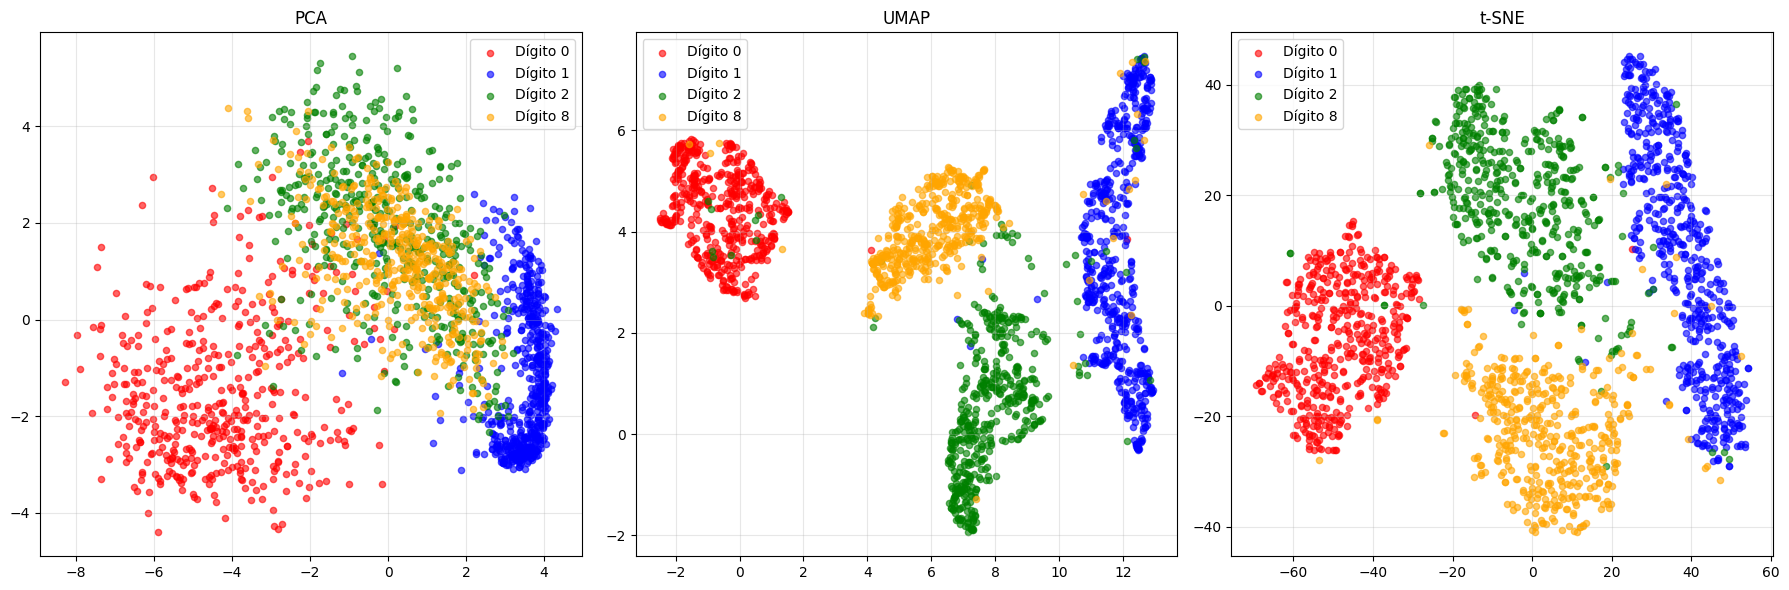


ANÁLISIS DE SEPARABILIDAD
PCA: Separabilidad = 2.60
UMAP: Separabilidad = 3.86
t-SNE: Separabilidad = 2.80


In [ ]:
from sklearn.datasets import fetch_openml

def mnist_manifold_analysis():
    """Análisis de la estructura de manifold en MNIST"""

    print("Cargando MNIST...")
    # Cargar solo algunos dígitos para simplicidad
    mnist = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')
    X, y = mnist

    # Convertir a números y tomar subset
    y = y.astype(int)
    digits_to_analyze = [0, 1, 2, 8]  # Dígitos con diferente complejidad

    subset_indices = np.isin(y, digits_to_analyze)
    X_subset = X[subset_indices][:2000]  # Limitar para velocidad
    y_subset = y[subset_indices][:2000]

    # Normalizar
    X_subset = X_subset / 255.0

    print(f"Dataset: {X_subset.shape[0]} muestras, {X_subset.shape[1]} dimensiones")
    print(f"Dígitos analizados: {digits_to_analyze}")

    # Análisis por dígito
    print("\n" + "="*50)
    print("DIMENSIÓN INTRÍNSECA POR DÍGITO")
    print("="*50)

    digit_results = {}
    for digit in digits_to_analyze:
        digit_data = X_subset[y_subset == digit]

        if len(digit_data) > 50:  # Suficientes muestras
            # Estimación de dimensión (usar k más pequeño por velocidad)
            estimated_dim = levina_bickel_estimator(digit_data, k=5)

            # PCA para comparación
            pca = PCA()
            pca.fit(digit_data)
            pca_95_dim = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1

            print(f"Dígito {digit}: Levina-Bickel={estimated_dim:.1f}, PCA(95%)={pca_95_dim}")

            digit_results[digit] = {
                'estimated_dim': estimated_dim,
                'pca_dim': pca_95_dim,
                'explained_variance': pca.explained_variance_ratio_[:20]
            }

    # Visualización con diferentes métodos
    print("\nAplicando reducción de dimensionalidad...")

    methods = {
        'PCA': PCA(n_components=2),
        'UMAP': umap.UMAP(n_components=2, random_state=42, n_neighbors=15),
        't-SNE': TSNE(n_components=2, random_state=42, perplexity=30)
    }

    fig, axes = plt.subplots(1, len(methods), figsize=(18, 6))

    colors = ['red', 'blue', 'green', 'orange']
    digit_colors = {digit: colors[i] for i, digit in enumerate(digits_to_analyze)}

    for i, (method_name, method) in enumerate(methods.items()):
        print(f"Aplicando {method_name}...")

        X_reduced = method.fit_transform(X_subset)

        for digit in digits_to_analyze:
            mask = y_subset == digit
            axes[i].scatter(X_reduced[mask, 0], X_reduced[mask, 1],
                          c=digit_colors[digit], label=f'Dígito {digit}',
                          alpha=0.6, s=20)

        axes[i].set_title(f'{method_name}')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Análisis de separabilidad
    print("\n" + "="*50)
    print("ANÁLISIS DE SEPARABILIDAD")
    print("="*50)

    # Calcular distancias intra-clase vs inter-clase
    for method_name, method in methods.items():
        X_reduced = method.fit_transform(X_subset)

        intra_distances = []
        inter_distances = []

        for digit in digits_to_analyze:
            digit_data = X_reduced[y_subset == digit]
            other_data = X_reduced[y_subset != digit]

            # Distancias intra-clase (dentro del mismo dígito)
            if len(digit_data) > 1:
                intra_dist = pairwise_distances(digit_data).flatten()
                intra_dist = intra_dist[intra_dist > 0]  # Remover distancias a sí mismo
                intra_distances.extend(intra_dist[:100])  # Subset para velocidad

            # Distancias inter-clase (a otros dígitos)
            if len(other_data) > 0:
                inter_dist = pairwise_distances(digit_data[:10], other_data[:100]).flatten()
                inter_distances.extend(inter_dist)

        separability = np.mean(inter_distances) / np.mean(intra_distances)
        print(f"{method_name}: Separabilidad = {separability:.2f}")

    return digit_results

# Ejecutar análisis MNIST
try:
    mnist_results = mnist_manifold_analysis()
except Exception as e:
    print(f"Error en MNIST: {e}")
    print("Continuando con otros experimentos...")